# DbScan

In [23]:
import pandas as pd

# preporcessing of the data
df=pd.read_csv('../../Data/data_MR_1.csv')
print("Checking for shape of data")
print(df.shape)
print("Checking for datatype information")
print(df.info())
print("Cehecking for null data")
print(df.isnull().sum())

#conclusion : no preporcessing is requiored it is a clean data

Checking for shape of data
(377580, 3)
Checking for datatype information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377580 entries, 0 to 377579
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       377580 non-null  float64
 1   y       377580 non-null  float64
 2   z       377580 non-null  float64
dtypes: float64(3)
memory usage: 8.6 MB
None
Cehecking for null data
x    0
y    0
z    0
dtype: int64


In [24]:
# beforre db scane the test data must be staandarized
from sklearn.model_selection import train_test_split
xtest,xtrain=train_test_split(df,test_size=0.3,random_state=7)

xtrain_std=(xtrain-xtrain.mean())/xtest.std()

from sklearn.cluster import DBSCAN
# as we know the paramater we have to give to the db scane is eps
db=DBSCAN(eps=0.2)
db.fit(xtrain_std.iloc[:500,:])
y_predict=db.fit_predict(xtrain_std.iloc[:500,:])
print(y_predict)


[ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 -1
  0  0  0  1  0  0  0 -1  0  0  0  0  0  0  0  0  0

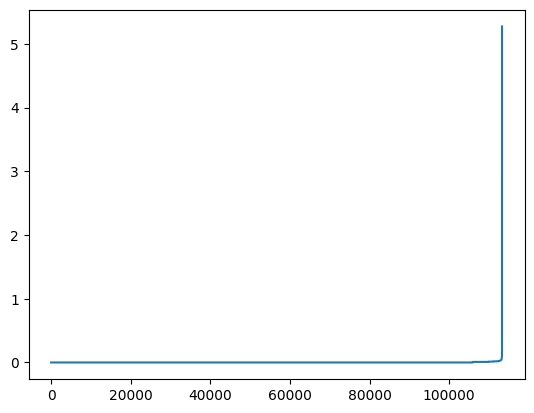

In [25]:
#Knee Method to find the perfect eps
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

nigh=NearestNeighbors(n_neighbors=2)
nbrs=nigh.fit(xtrain_std)
distance,indices=nbrs.kneighbors(xtrain_std)
distances = np.sort(distance, axis=0)
#print(distance)
distances=distances[:,1]
plt.plot(distances)

# by seeing the graph we cas say that eps=0.2 may be the accurate eps we needed

# outlier detection 

In [26]:
import numpy as np
print('Number of clusters: {}'.format(len(set(y_predict[np.where(y_predict != -1)]))))
print('Outliers :', len(y_predict[np.where(y_predict == -1)]))

y_predict

Number of clusters: 2
Outliers : 13


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0